In [5]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Store filepath in a variable
sleep_file = "Resources/Sleep_Efficiency.csv"
sleep_df = pd.read_csv(sleep_file)

In [7]:
# Show the first five rows.
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


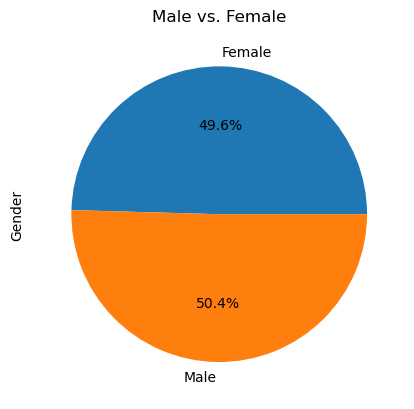

In [9]:
# Population Description - Pie Chart
# Gender
gender_df = sleep_df.groupby(["Gender"])
gender_counts = gender_df["Gender"].count()
gender_chart = gender_counts.plot(kind="pie", y="Gender",
                                  autopct='%1.1f%%', 
                                  title="Male vs. Female")
plt.show()


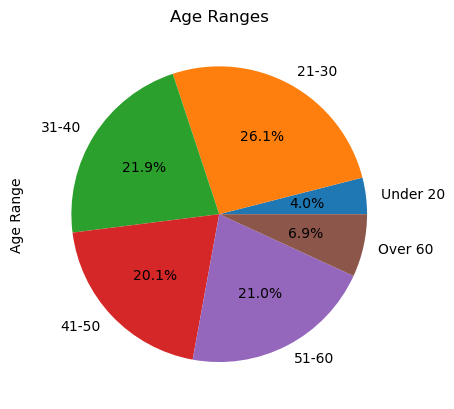

In [16]:
# Population Description - Pie Chart
# Age
# Create bins
age_bins = [0, 20, 30, 40, 50, 60, 70]
labels = ["Under 20", "21-30", "31-40", "41-50", "51-60", "Over 60"]
age_df = sleep_df.copy()
age_df["Age Range"] = pd.cut(age_df["Age"], age_bins, labels=labels)

# Create chart
age_df = age_df.groupby(["Age Range"])
age_counts = age_df["Age Range"].count()
age_chart = age_counts.plot(kind="pie", y="Age Range",
                        autopct='%1.1f%%',
                        title="Age Ranges")
plt.show()

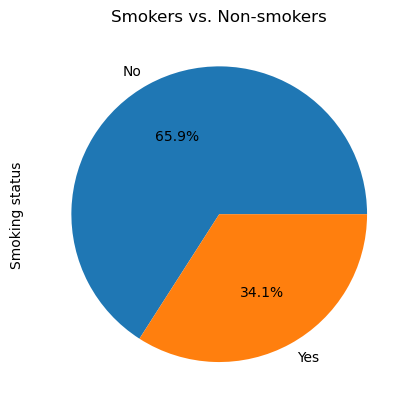

In [17]:
# Population Description - Pie Chart
# Number of Smokers
smoking_df = sleep_df.groupby(["Smoking status"])
smoking_counts = smoking_df["Smoking status"].count()
smoking_chart = smoking_counts.plot(kind="pie", y="Smoking status",
                                  autopct='%1.1f%%', 
                                  title="Smokers vs. Non-smokers")
plt.show()


In [ ]:
# Summary
# Average of all numerical values
# Bar Chart
# Awakenings
# # of smokers
# Scatterplots - Age v/s Exercise,Alcohol Consumption
# Pankaj


In [ ]:
# Factors affecting sleep 1
# Edgar

In [ ]:
# Factors affecting sleep 2
# Kanwal